In [1]:
import numpy as np

In [8]:
#Load predictions
preds = np.load('mathing_preds.npz', allow_pickle=True)
preds = preds['arr_0'][()]

In [9]:
#Filter out top 40% predictions with less confidence
percentile = np.percentile(preds['conf'], 40)
mask = preds['conf'] > percentile

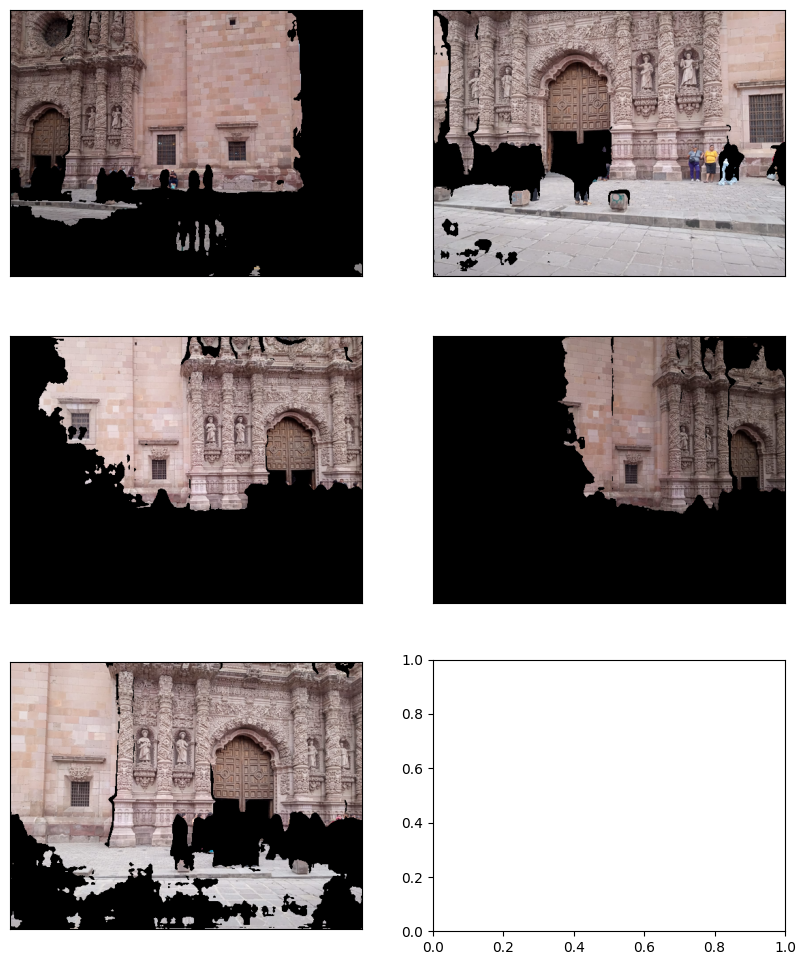

In [10]:
#Show pixels included in reconstruction
import matplotlib.pyplot as plt

images = preds['images']
images[~mask] = 0

fig, axs = plt.subplots(len(images)//2 + 1, 2, figsize=(10, 12))
for img, ax in zip(images, axs.flatten()):
    ax.imshow(img)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

In [11]:
#Built point clouds
import open3d as o3d

point_cloud = o3d.geometry.PointCloud()

points = preds['world_points'][mask].reshape(-1, 3)
colors = images[mask].reshape(-1, 3)

point_cloud.points = o3d.utility.Vector3dVector(points)
point_cloud.colors = o3d.utility.Vector3dVector(colors)

In [7]:
#Show point clouds
o3d.visualization.draw_geometries([point_cloud])